Multivariate Linear Regression
Test Dataset: Mean Absolute Error (MAE): 42.79
Train Dataset: Mean Absolute Error (MAE): 43.48
Test Dataset: Mean Absolute Percentage Error (MAPE): 0.37%
Train Dataset: Mean Absolute Percentage Error (MAPE): 0.39%
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38

Multivariate Polynomial Regression
Test Dataset: Mean Absolute Error (MAE): 43.58
Train Dataset: Mean Absolute Error (MAE): 39.14
Test Dataset: Mean Absolute Percentage Error (MAPE): 0.38%
Train Dataset: Mean Absolute Percentage Error (MAPE): 0.34%
y = -9.59 * x_0 + -11.24 * x_1 + -19.70 * x_2 + 10.64 * x_3 + -16.59 * x_4 + 26.14 * x_5 + 11.13 * x_6 + -160.29 * x_7 + -1768.67 * x_8 + -13.82 * x_9 + 0.03 * x_10 + 0.53 * x_11 + -0.05 * x_12 + 0.01 * x_13 + -0.00 * x_14 + -0.04 * x_15 + 0.08 * x_16 + 1.31 * x_17 + 0.41 * x_18 + 0.01 * x_19 + -33.71 * x_20 + 0.36 * x_21 + 0.41 * x_22 + 0.21 * x_23 + 0.25

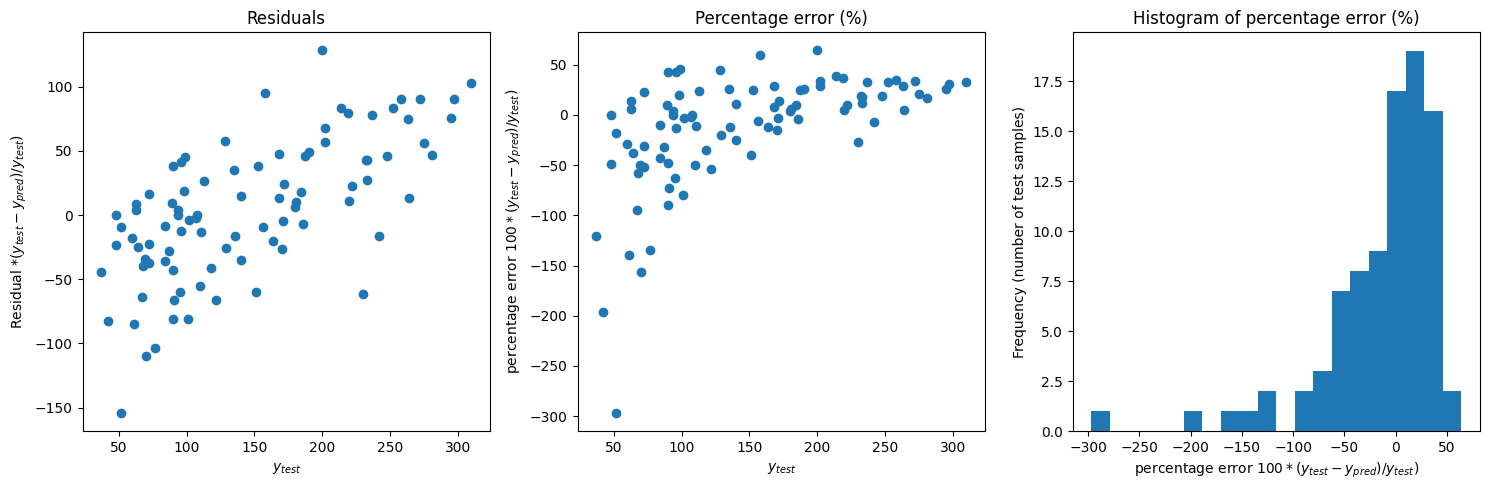

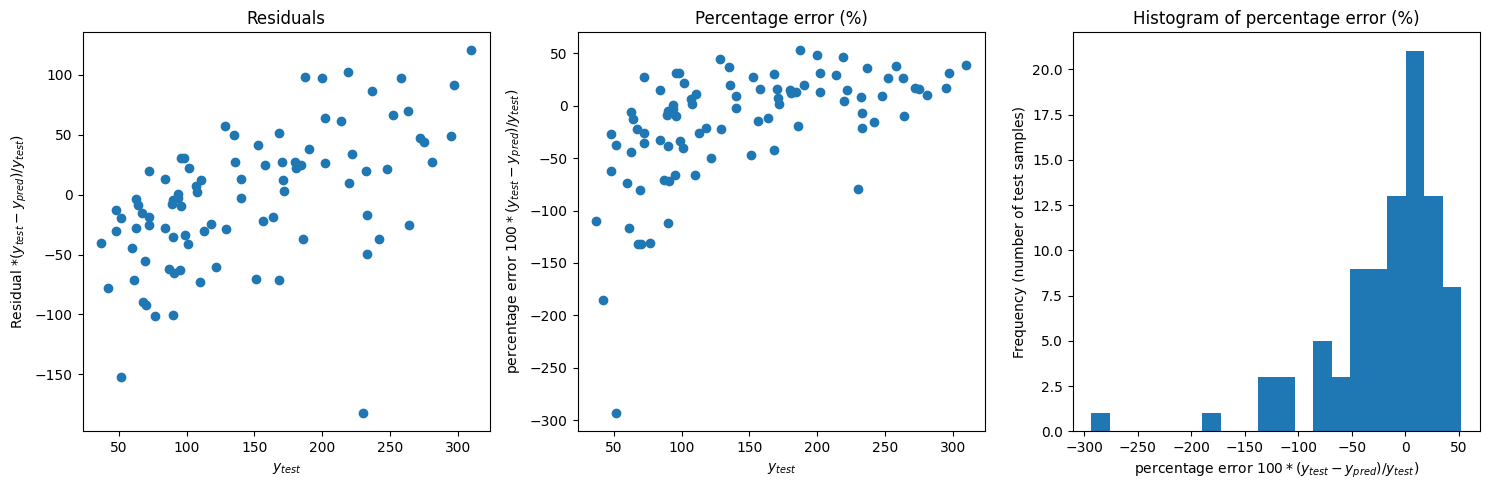

In [1]:

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multivariate Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_train_linear = linear_regression.predict(X_train)
y_pred_test_linear = linear_regression.predict(X_test)

# Multivariate Polynomial Regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

polynomial_regression = LinearRegression()
polynomial_regression.fit(X_train_poly, y_train)
y_pred_train_poly = polynomial_regression.predict(X_train_poly)
y_pred_test_poly = polynomial_regression.predict(X_test_poly)

def model_estimation(model, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE and MAPE. 
    Inputs:
        model: the model to be evaluated
        X_train: the features of the train dataset
        X_test: the features of the test dataset
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE and MAPE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')
    print(f'Test Dataset: Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_pred_train):.2f}')
    print(f'Test Dataset: Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, y_pred_test):.2f}%')
    print(f'Train Dataset: Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_train, y_pred_train):.2f}%')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

# Call the model_estimation function for linear regression
print("Multivariate Linear Regression")
model_estimation(linear_regression, X_train, X_test, y_train, y_test, y_pred_train_linear, y_pred_test_linear)
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_train_linear = linear_regression.predict(X_train)
y_pred_test_linear = linear_regression.predict(X_test)

# Call the model_estimation function for polynomial regression
print("\nMultivariate Polynomial Regression")
model_estimation(polynomial_regression, X_train_poly, X_test_poly, y_train, y_test, y_pred_train_poly, y_pred_test_poly)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
polynomial_regression = LinearRegression()
polynomial_regression.fit(X_train_poly, y_train)
y_pred_train_poly = polynomial_regression.predict(X_train_poly)
y_pred_test_poly = polynomial_regression.predict(X_test_poly)

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the Diabetes dataset
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform multivariate linear regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Calculate predictions for linear regression on training set
lin_pred_train = lin_model.predict(X_train)

# Performance metrics of lin_model for evaluation
lin_mae = mean_absolute_error(y_train, lin_pred_train)
lin_mape = mean_absolute_percentage_error(y_train, lin_pred_train)
lin_rmse = math.sqrt(mean_squared_error(y_train, lin_pred_train))
lin_r2 = r2_score(y_train, lin_pred_train)

print("Linear Regression Metrics:")
print("  MAE:", lin_mae)
print("  MAPE:", lin_mape)
print("  RMSE:", lin_rmse)
print("  R-squared:", lin_r2)

# Perform multivariate polynomial regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

# Fit polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Calculate predictions for polynomial regression on test set
poly_pred_test = poly_model.predict(poly_features.transform(X_test))

# Performance metrics of poly_model for evaluation
poly_mae = mean_absolute_error(y_test, poly_pred_test)
poly_mape = mean_absolute_percentage_error(y_test, poly_pred_test)
poly_rmse = math.sqrt(mean_squared_error(y_test, poly_pred_test))
poly_r2 = r2_score(y_test, poly_pred_test)

print("Polynomial Regression Metrics:")
print("  MAE:", poly_mae)
print("  MAPE:", poly_mape)
print("  RMSE:", poly_rmse)
print("  R-squared:", poly_r2)


Linear Regression Metrics:
  MAE: 43.483503523980396
  MAPE: 0.38919947147960526
  RMSE: 53.55884336723094
  R-squared: 0.5279193863361498
Polynomial Regression Metrics:
  MAE: 43.58169325426564
  MAPE: 0.3828567851352886
  RMSE: 55.64196534385137
  R-squared: 0.4156399336441816


 Question:
 
 1:How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values.
 
 Ans:In linear regression, each feature in the dataset and the intercept term are independently fitted with a single parameter (coefficient). In a linear regression, the number of parameters is equal to the number of features plus one.

The degree of the polynomial and the number of features affect how many parameters are used in polynomial regression. The formula to calculate it is (n + d)! / (n! * d)!, where n is the number of features and d is the polynomial's degree. The coefficients for the polynomial terms and the intercept term are represented by the parameters in polynomial regression. A distinct feature or feature combination produced by the polynomial transformation is represented by each coefficient.
In the previous model development step, we fitted the "X_train" dataset, which has a shape of (353,10 ), into the linear regression model . This means that the "X_train" dataset has 353 samples (rows) and 10 features (columns).

For the polynomial regression model (poly_model), we transformed the "X_train" dataset into "X_train_poly" using polynomial features. The shape of the "X_train_poly" dataset is (65).


2:Which model would you choose for deployment, and why?

Ans:The choice of model for deployment depends on various factors, such as the specific problem, the quality of fit, interpretability, and computational efficiency.

In this instance, we have trained a multivariate polynomial regression model of the second degree as well as a multivariate linear regression model. We must take the evaluation criteria and the goodness-of-fit into account in order to choose the appropriate model for deployment.

For both models, we have calculated the Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE). These measures shed light on the models' relative performance and accuracy. The MAE and MAPE values for the linear regression and polynomial regression models can be compared. One model may be preferred for deployment if it consistently outperforms the other in terms of reduced MAE and MAPE. We can also take into account the R-squared values, which represent the percentage of variance explained by the models.

3:What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

Ans:The provided function plots three graphs: residuals, percentage error, and a histogram of the percentage error. These graphs provide insights into the goodness-of-fit and the performance of the models.
Residuals:

We anticipate the residuals to be randomly dispersed around zero, with no obvious pattern or trend, for a satisfactory match.
The residuals may not accurately represent the underlying relationships if they exhibit a pattern or trend, such as a funnel shape or a rising or decreasing pattern.

Error percentage:

The quantity and direction of errors are revealed by the scatter plot of percentage error.
To have a balanced prediction performance, the percentage mistakes should ideally be centred at zero.
If the target variable is routinely over- or under-estimated in the percentage errors, for example, it shows that the model may have a propensity to be biassed in its predictions.

Error percentage histogram:

The histogram sheds light on the spread and distribution of the percentage mistakes.
Positive and negative errors should be evenly distributed, according to a symmetric histogram centred on zero.
A skewed histogram or a high number of outliers indicate that the model might have problems with some data points or regions of the target variable.